In [1]:
# CELL1 – 1 mark
# Write code to read the given data in text format (i.e., “2017Health.txt”) into required tabular data structure: 
# make the county (i.e., Alachua, Baker…) be the index of the returned data structure;
# the first column of the returned data structure represents the “Years of Potential Life Lost Rate”;
# the second column represents the “Teen Birth Rate”;
# the third column represents the “Violent Crime Rate”;
# and the last column represents the “Percentage Smokers”.
# – Display the returned tabular data structure in your programme.

################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats as st
################################################################################################################################

nai_data = pd.read_table('2017Health.txt',index_col=['County'])
del nai_data.index.name
del nai_data['State']
pd.set_option('display.max_rows', 70)
nai_data





Populating the interactive namespace from numpy and matplotlib


,Years of Potential Life Lost Rate,Teen Birth Rate,Violent Crime Rate,Percentage Smokers
Alachua,6633,19,579,16
Baker,8270,58,360,19
Bay,9168,50,508,18
Bradford,10346,61,461,18
Brevard,7722,25,518,16
Broward,5737,23,441,15
Calhoun,6415,59,130,19
Charlotte,7353,30,219,14
Citrus,10052,39,356,17
Clay,6796,26,338,15


In [2]:
# CELL2 – 5 marks
# Write code to analyse the data contained in the variable called “Percentage Smokers”.
# –  Print the “mean of Percentage Smokers”.
# –  Print the “minimum of Percentage SmodelAerrormokers”.
# –  Print the “maximum of Percentage Smokers”.
# –  Print the “standard deviation of Percentage Smokers”.
# –  Print the “95% confidence interval of Percentage Smokers”.

print('mean of Percentage Smokers: ', round(mean(nai_data['Percentage Smokers']),2))
print('minimum of Percentage Smokers: ', (min(nai_data['Percentage Smokers'])))
print('maximum of Percentage Smokers: ', (max(nai_data['Percentage Smokers'])))
print('standard deviation of Percentage Smokers: ', round(std(nai_data['Percentage Smokers']),2))

i = np.array(nai_data['Percentage Smokers'])
print('95% Condidence interval of Percentage Smokers: ', (st.t.interval(0.95, len(i)-1, loc=mean(i), scale=st.sem(i))))


mean of Percentage Smokers:  16.92
minimum of Percentage Smokers:  11
maximum of Percentage Smokers:  21
standard deviation of Percentage Smokers:  2.37
95% Condidence interval of Percentage Smokers:  (16.337233714605663, 17.511251133879188)


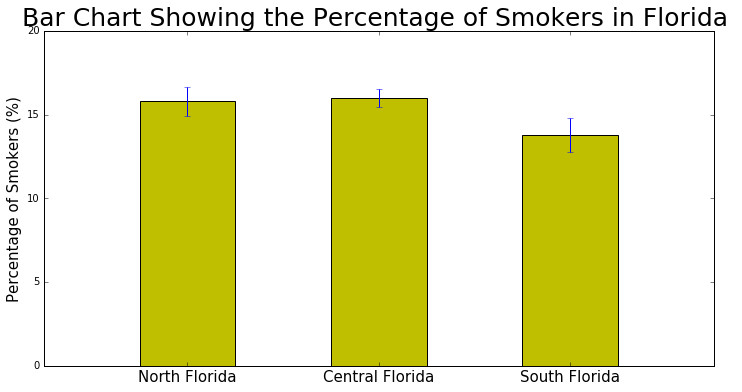

In [6]:
# CELL3 – 9 marks
# Write code to plot a bar graph that uses bars to compare the “Percentage Smokers” of North Florida, Central Florida
# and South Florida. North Florida: use the measures of the following counties: Duval, Alachua, Leon, Flagler, Marion; 
# Central Florida: use the measures of the following counties: Orange, Polk, Hillsborough, Pinellas, Brevard; 
# South Florida: use the measures of the following counties: Miami-Dade, Broward, Lee, Palm Beach, Sarasota.
# – Visualise a single plot: the horizonal axis shows the data categories being compared 
# (i.e., North Florida, Central Florida and South Florida); 
# and the vertical axis represents the mean measure of Percentage Smokers.
# – Add error bars to the bar graph, showing the 95% confidence interval.
# – Add appropriate title, horizontal axis label and vertical axis label to the bar graph.

#North Florida
NF = ['Duval', 'Alachua', 'Leon', 'Flagler', 'Marion']
NF_data = nai_data['Percentage Smokers'].ix[NF]
NF_m = mean(NF_data)
NF_err = 1.96*std(NF_data)/sqrt(len(NF_data))

#Central Florida
CF = ['Orange', 'Polk', 'Hillsborough', 'Pinellas', 'Brevard']
CF_data = nai_data['Percentage Smokers'].ix[CF]
CF_m = mean(CF_data)
CF_err = 1.96*std(CF_data)/sqrt(len(CF_data))

#South Florida
SF = ['Miami-Dade', 'Broward', 'Lee', 'Palm Beach', 'Sarasota']
SF_data = nai_data['Percentage Smokers'].ix[SF]
SF_m = mean(SF_data)
SF_err = 1.96*std(SF_data)/sqrt(len(SF_data))

#GRAPH
figure(figsize(12,6))
width=0.5
NumberOfBars = 3
ind = np.arange(NumberOfBars)
bar(ind, [NF_m, CF_m, SF_m], width, color='y', yerr=[NF_err, CF_err, SF_err])

title('Bar Chart Showing the Percentage of Smokers in Florida ', fontsize=25)
ylabel('Percentage of Smokers (%)', fontsize=15)
xtickloc = np.arange(3)+(width/2)
xticklabels = ('North Florida', 'Central Florida', 'South Florida')
xticks(xtickloc, xticklabels, rotation='horizontal', fontsize=15)

xlim(-0.5, 3)
ylim(0, 20)

show()
#Teen Birth Rate (TBR)” and “Percentage Smokers (PS)

In [4]:
# CELL4 – 4 marks
# Based on the following two predictor variables: “Teen Birth Rate (TBR)” and “Percentage Smokers (PS)”, 
# write code to build a linear regression model to estimate the “Years of Potential Life Lost Rate (YPLLR)”.
# – Print the resulting linear equation in the programme.

import statsmodels.api as sm

comb=nai_data[['Teen Birth Rate', 'Percentage Smokers']]

comb=sm.add_constant(comb)

results= sm.OLS(nai_data['Years of Potential Life Lost Rate'], comb).fit()

print(results.summary())

slope_PS = results.params[2]
slope_TBR = results.params[1]
intercept = results.params[0]

print('OLS slope_PS=', round(slope_PS,2))
print('OLS slope_TBR=', round(slope_TBR,2))
print('OLS intercept=', round(intercept,2))
print('Regression Model: Years of Potential Life Lost Rate (YPLLR) = ' + str(round(slope_PS,2)) + '*Percentage Smokers+' + str(round(slope_TBR, 2)) + '*Teen Birth Rate+' + str(round(intercept, 2)))    




                                    OLS Regression Results                                   
Dep. Variable:     Years of Potential Life Lost Rate   R-squared:                       0.423
Model:                                           OLS   Adj. R-squared:                  0.404
Method:                                Least Squares   F-statistic:                     23.05
Date:                               Thu, 07 Dec 2017   Prob (F-statistic):           3.08e-08
Time:                                       17:45:07   Log-Likelihood:                -557.69
No. Observations:                                 66   AIC:                             1121.
Df Residuals:                                     63   BIC:                             1128.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                         coef    std err          t      P>|

In [8]:
# CELL5 – 6 marks
# Based on the error of prediction (i.e., the absolute error/difference between the measured “Years of Potential Life Lost Rate”
# and the predicted “Years of Potential Life Lost Rate”), compare the following two linear models 
#
#   Model A: YPLLR = 60.6 × TBR + 5297.06
#   Model B: YPLLR = 1.36 × VCR + 7254.3
#
# and advise the data analytics team which model should be used. Write code to perform appropriate statistical data analysis.
# – Print the mean absolute error (MAE) of the model A.
# – Print the mean absolute error (MAE) of the model B.
# – Print the main results of the data analysis processes, including normality test and statistical significance test.
# – Print ONE sentence, stating your conclusion and justification on the difference in performance between two models, 
# in terms of predicting the “Years of Potential Life Lost Rate”.

#modelA

pred_modelA = 60.6*nai_data['Teen Birth Rate']+5297.06 

real_modelA = nai_data['Years of Potential Life Lost Rate']

modelAerror=abs(pred_modelA - real_modelA)
MAEA = mean(modelAerror)
print('MAE of Model A= ', round(MAEA,2))

#modelB

pred_modelB = 1.36*nai_data['Violent Crime Rate']+7254.3

real_modelB = nai_data['Years of Potential Life Lost Rate']

modelBerror=abs(pred_modelB - real_modelB)
MAEB = mean(modelBerror)
print('MAE of Model B= ', round(MAEB,2))



#normality test 
print("")
mdla = nai_data['Teen Birth Rate'].values
normA = st.shapiro(mdla)
print('Normality Test for Model A: ', normA)
print('Is Model A normal? - ', normA[1]>0.05)
print("")
mdlb = nai_data['Violent Crime Rate'].values
normB = st.shapiro(mdlb)
print('Normality Test for Model B: ', normB)
print('Is Model B normal? - ', normB[1]>0.05)
print("")

print('\nAs the p-value of the normality test for Model A is greater than 0.05, we can state that the model is normal')
print('\nAs the p-value of the normality test for Model B is less than 0.05, we can state that the model is not normal')

print("")

#statistical test

modelA_mean = mean(mdla)
modelB_mean = mean(mdlb)

print('Mann-Whitney U test statistical result: ',st.mannwhitneyu(mdla, mdlb, alternative= 'two-sided')[1]>0.05)


print('\nAs the p-value of the statistical test is less than 0.05, we can say that there is a statitical significant difference between model A and model B')



MAE of Model A=  948.46
MAE of Model B=  1219.42

Normality Test for Model A:  (0.9735689163208008, 0.17067232728004456)
Is Model A normal? -  True

Normality Test for Model B:  (0.9604121446609497, 0.033844687044620514)
Is Model B normal? -  False


As the p-value of the normality test for Model A is greater than 0.05, we can state that the model is normal

As the p-value of the normality test for Model B is less than 0.05, we can state that the model is not normal

Mann-Whitney U test statistical result:  False

As the p-value of the statistical test is less than 0.05, we can say that there is a statitical significant difference between model A and model B
